In [63]:
#hide
! pip install -Uqq fastbook 
! pip install gradio
import fastbook
fastbook.setup_book()
from fastbook import *
import gradio as gr

In [64]:
sisters = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [65]:
path = Path('sestrychky')
dls = sisters.dataloaders(path)

In [66]:
sisters = sisters.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = sisters.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.331594,4.729084,0.542857,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.395670,3.273010,0.542857,00:13
1,1.183466,1.885589,0.542857,00:12
2,1.111982,0.826294,0.371429,00:13
3,0.990672,0.668500,0.314286,00:13
4,0.864231,0.661165,0.314286,00:13
5,0.762160,0.638308,0.228571,00:13
6,0.680134,0.576702,0.228571,00:13
7,0.630823,0.507206,0.257143,00:13
8,0.571544,0.452650,0.200000,00:13
9,0.530888,0.439050,0.228571,00:13


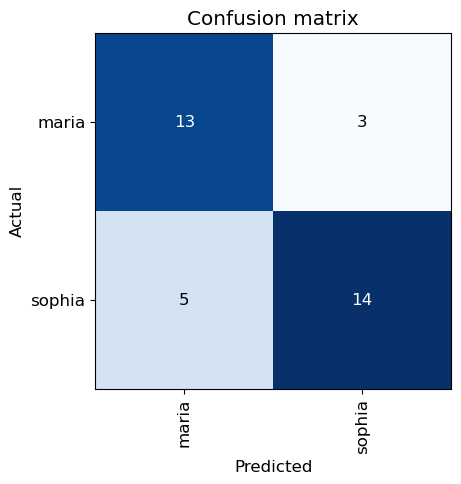

In [68]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

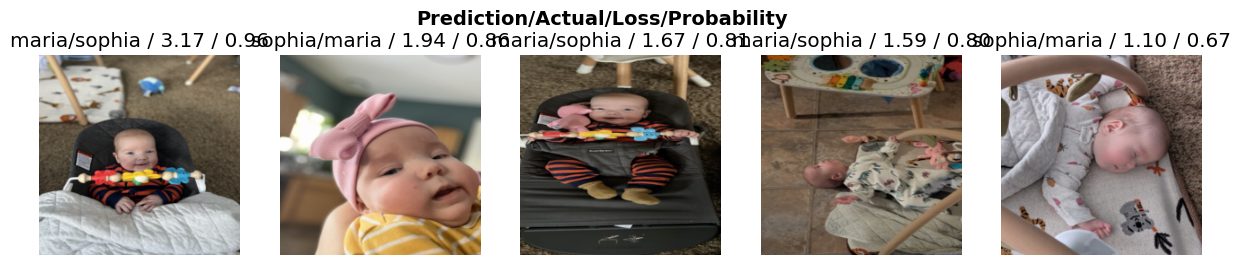

In [69]:
interp.plot_top_losses(5, nrows=1)

In [70]:
#hide_output
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner